In [186]:
pip install yellowbrick

     |████████████████████████████████| 282 kB 8.7 MB/s            
     |████████████████████████████████| 7.8 MB 538 kB/s             
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
from os.path import exists
data_dir = 'data'
#data_dir = 'Documents/Users/kobo/514-assignment-1/data'
assert exists(f'{data_dir}/letter-recognition.data'), 'data file is missing.'
data = pd.read_csv(f'{data_dir}/letter-recognition.data')

In [3]:
names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']

dataset = pd.read_csv(f'{data_dir}/letter-recognition.data', names=names)

(20000, 17)
              x-box         y-box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968 

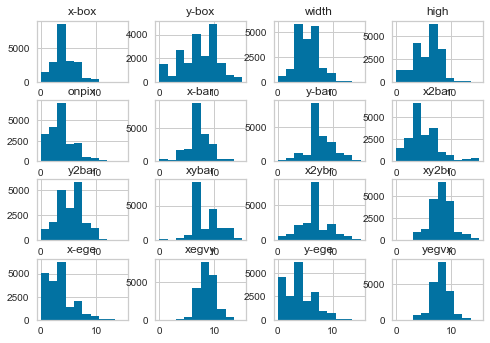

In [6]:
#Return the dimensionality of the DataFrame
print(dataset.shape)

#Generates descriptive statistics
print(dataset.describe())

#class distribution
print(dataset.groupby('class').size())

#histograms
dataset.hist()
plt.show()

In [7]:
array = dataset.values

X = array[:, 1:17]
Y = array[:, 0]

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)

X matrix dimensionality: (20000, 16)
Y vector dimensionality: (20000,)


In [8]:
# split the data into a training set and a test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.10,
                                                                                random_state=10)


In [11]:
svc = SVC(kernel='rbf', gamma='auto', C=6)

cm = ConfusionMatrix(svc, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.978

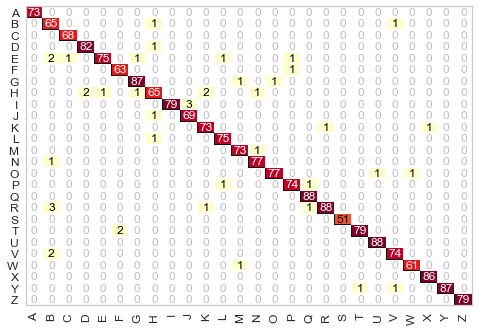

In [12]:
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [13]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

cm.poof()

Accuracy:  0.978
[[73  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 65  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 82  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  1  0 75  0  1  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 63  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 87  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  2  1  0  1 65  0  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 79  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  1  0 69  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 73  0  0  0  0  0  0  1  0  0  0  0  0  1
   0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 75  0  0  0  0  0  0  0  0  0  0  0

<Figure size 576x396 with 0 Axes>

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.046 total time=  20.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.044 total time=  20.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.045 total time=  20.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.045 total time=  20.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.043 total time=  20.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=  17.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=  16.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=  17.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=  16.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.856 total time=  17.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.827 total time=  10.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.496 total time=  23.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.494 total time=  28.3s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.489 total time=  26.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.500 total time=  23.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.965 total time=  14.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.968 total time=  16.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.980 total time=  14.9s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.976 total time=  14.9s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.976 total time=  14.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.966 total time=   4.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.966 total time=   4.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.973 total time=   4.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [17]:
grid_predictions = grid.predict(X_validation)
  
# print classification report
print(classification_report(Y_validation, grid_predictions))

              precision    recall  f1-score   support

           A       0.99      1.00      0.99        73
           B       0.92      0.97      0.94        67
           C       0.97      1.00      0.99        68
           D       0.99      0.98      0.98        83
           E       0.99      0.93      0.96        81
           F       0.95      0.98      0.97        64
           G       0.98      0.97      0.97        89
           H       0.94      0.92      0.93        72
           I       1.00      0.98      0.99        82
           J       0.97      0.97      0.97        70
           K       0.96      0.99      0.97        75
           L       0.97      0.99      0.98        76
           M       0.94      0.99      0.96        74
           N       0.96      0.99      0.97        78
           O       0.97      0.96      0.97        79
           P       0.97      0.97      0.97        76
           Q       0.98      1.00      0.99        88
           R       0.98    

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [21]:
le=LabelEncoder()
Y_validation[:]=le.fit_transform(Y_validation[:])
Y_validation = Y_validation.astype(int)
grid_predictions[:]=le.fit_transform(grid_predictions[:])